In [1]:
import numpy as np
import util
import NN
np.random.seed(5)

In [2]:
EPOCHS = 1000

x, y = util.generate_XOR_easy()
layers = [
    NN.FC_layer(2, 32, True),
    NN.relu(),
    NN.FC_layer(32, 32, True),
    NN.relu(),
    NN.FC_layer(32, 1, True),
    NN.sigmoid()
]
DNN = NN.myNN(layers)
loss = NN.MSE()
#opti = NN.optimizer('SGD', 0.01)
#opti = NN.optimizer('momentum', 0.01, {'beta' : 0.9})
#opti = NN.optimizer('adagrad', 0.001, {'epsilon' : 1e-8})
opti = NN.optimizer('adam', 0.001, {'epsilon':1e-8, 'beta1':0.9, 'beta2':0.999})

for epoch in range(1, EPOCHS+1):
    y_pred = DNN.forward(x)
    loss_value = loss.forward(y, y_pred)

    dy = loss.backward(y, y_pred)
    DNN.backward(dy, opti)

    if epoch % 100 == 0:
        accuracy = util.accuracy(y, y_pred)
        print(f'epoch: {epoch}, loss: {loss_value}, accuracy: {accuracy}')


epoch: 100, loss: 0.19662870389120002, accuracy: 0.7142857142857143
epoch: 200, loss: 0.09419592067793363, accuracy: 0.9047619047619048
epoch: 300, loss: 0.07929445500614223, accuracy: 0.9047619047619048
epoch: 400, loss: 0.059766306196265606, accuracy: 0.9523809523809523
epoch: 500, loss: 0.04519161549304437, accuracy: 0.9523809523809523
epoch: 600, loss: 0.038701677305935586, accuracy: 0.9523809523809523
epoch: 700, loss: 0.033942945866833135, accuracy: 0.9523809523809523
epoch: 800, loss: 0.03032129490456516, accuracy: 1.0
epoch: 900, loss: 0.027307267107561446, accuracy: 1.0
epoch: 1000, loss: 0.02469947374651763, accuracy: 1.0


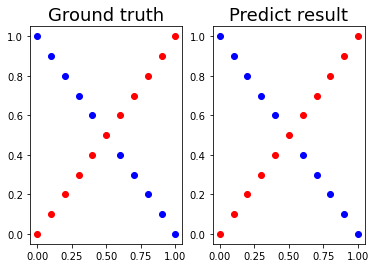

In [3]:
y_pred = np.around(y_pred)
util.show_result(x, y, y_pred)